# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


ModuleNotFoundError: No module named 'api_keys'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=e3ccf44e02cf0a5895ed131fd26f64b2&units=imperial&q='

In [5]:
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 63.7506, 'lon': -68.5145},
 'dt': 1644359389,
 'id': 5983720,
 'main': {'feels_like': -12.91,
          'humidity': 84,
          'pressure': 1002,
          'temp': -0.31,
          'temp_max': -0.31,
          'temp_min': -0.67},
 'name': 'Iqaluit',
 'sys': {'country': 'CA',
         'id': 47658,
         'sunrise': 1644324615,
         'sunset': 1644353179,
         'type': 2},
 'timezone': -18000,
 'visibility': 1609,
 'weather': [{'description': 'light snow',
              'icon': '13n',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 160, 'speed': 13.8}}


In [6]:
# set up lists to hold reponse info
thiscity = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
for idx, city in enumerate(cities):
    try:
        response = requests.get(query_url + city).json()
        thiscity.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])                  
        print(f"Weather check for city {idx}: {city}")
    
    except:
        print(f"Missing result... city {idx}: {city} NOT FOUND")

Weather check for city 0: pascagoula
Weather check for city 1: punta arenas
Weather check for city 2: ahipara
Weather check for city 3: pangnirtung
Weather check for city 4: haines junction
Weather check for city 5: sangar
Weather check for city 6: ushuaia
Weather check for city 7: springbok
Weather check for city 8: albany
Weather check for city 9: necochea
Weather check for city 10: mataura
Weather check for city 11: bredasdorp
Weather check for city 12: hermanus
Weather check for city 13: busselton
Weather check for city 14: carnarvon
Weather check for city 15: moshi
Weather check for city 16: georgetown
Weather check for city 17: cidreira
Weather check for city 18: ternate
Weather check for city 19: inirida
Missing result... city 20: burica NOT FOUND
Weather check for city 21: vaini
Weather check for city 22: hilo
Missing result... city 23: taolanaro NOT FOUND
Missing result... city 24: amderma NOT FOUND
Weather check for city 25: atuona
Weather check for city 26: ribeira grande
Mi

Weather check for city 218: kastornoye
Weather check for city 219: mar del plata
Weather check for city 220: provideniya
Weather check for city 221: batagay-alyta
Weather check for city 222: svetlogorsk
Weather check for city 223: oromocto
Weather check for city 224: longyearbyen
Weather check for city 225: cubuk
Weather check for city 226: pitimbu
Weather check for city 227: broome
Weather check for city 228: jijiga
Weather check for city 229: kodiak
Weather check for city 230: oranjestad
Weather check for city 231: keizer
Weather check for city 232: nelson bay
Weather check for city 233: bushehr
Missing result... city 234: illoqqortoormiut NOT FOUND
Weather check for city 235: west odessa
Weather check for city 236: kathmandu
Weather check for city 237: caldwell
Weather check for city 238: gawler
Weather check for city 239: port hardy
Weather check for city 240: grand-santi
Weather check for city 241: hailey
Weather check for city 242: kalmunai
Weather check for city 243: dikson
Weat

Weather check for city 434: nioro
Weather check for city 435: vila velha
Weather check for city 436: ballina
Weather check for city 437: boguchany
Weather check for city 438: san pedro de ycuamandiyu
Weather check for city 439: santa maria
Weather check for city 440: sterling
Weather check for city 441: ailigandi
Weather check for city 442: port blair
Weather check for city 443: dalvik
Weather check for city 444: lichuan
Missing result... city 445: barroualie NOT FOUND
Weather check for city 446: cayeli
Weather check for city 447: george town
Weather check for city 448: komsomolskiy
Weather check for city 449: stromness
Weather check for city 450: zharkent
Weather check for city 451: morropon
Weather check for city 452: menongue
Weather check for city 453: taunggyi
Weather check for city 454: casma
Weather check for city 455: latehar
Weather check for city 456: wadi maliz
Weather check for city 457: cayenne
Missing result... city 458: tumannyy NOT FOUND
Weather check for city 459: aira

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
print(len(thiscity))
print(len(lat))
print(len(lon))
print(len(max_temp))

563
563
563
563


In [4]:
# create the data frame
weather_dict = {
    'city': thiscity,
    'lat': lat,
    'lon': lon,
    'max temp': max_temp,
    'humidity': humidity,
    'cloudiness': cloudiness,
    'wind speed': wind_speed,
    'country': country,
    'date': date
}
city_df = pd.DataFrame(weather_dict)
city_df.head(30)

NameError: name 'thiscity' is not defined

In [9]:
# export to a CSV
city_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
high_humidity_df = city_df[(city_df['humidity'] > 100)]
high_humidity_df.index

Int64Index([], dtype='int64')

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#clean_city_df = city_df.join(high_humidity_df, how='outer')
#clean_city_df = pd.merge(city_df, high_humidity_df, on=index)
#clean_city_df

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [3]:
# date of analysis
find_date = city_df["date"][0]
run_date = pd.to_datetime(find_date, unit='s')
run_date

NameError: name 'city_df' is not defined

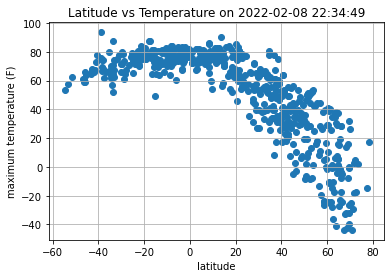

In [12]:
# lat vs temp basic plot
x_lat = city_df['lat']
y_maxtemp = city_df['max temp']
plt.scatter(x_lat, y_maxtemp)

# titles, labels, and design elements
plt.title(f'Latitude vs Temperature on {run_date}')
plt.xlabel('latitude')
plt.ylabel('maximum temperature (F)')
plt.grid()

# display plot
plt.show()

In this plot we see that temperatures are higest near the equator (0deg latitude). 

In [13]:
# export .png to file
plt.savefig("../output_data/LatVsTemp.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

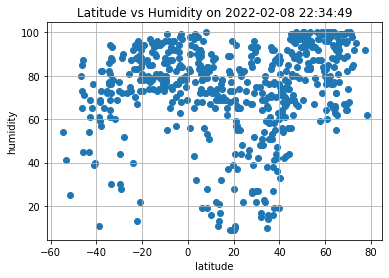

In [14]:
# lat vs temp basic plot
x_lat = city_df['lat']
y_humidity = city_df['humidity']
plt.scatter(x_lat, y_humidity)

# titles, labels, and design elements
plt.title(f'Latitude vs Humidity on {run_date}')
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.grid()

# display plot
plt.show()

In [15]:
# export .png to file
plt.savefig("../output_data/LatVsHumidity.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Cloudiness Plot

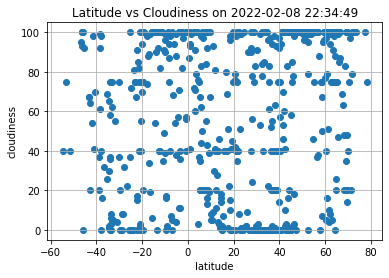

In [16]:
# lat vs temp basic plot
x_lat = city_df['lat']
y_cloudiness = city_df['cloudiness']
plt.scatter(x_lat, y_cloudiness)

# titles, labels, and design elements
plt.title(f'Latitude vs Cloudiness on {run_date}')
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.grid()

# display plot
plt.show()

In [17]:
# export .png to file
plt.savefig("../output_data/LatVsCloudiness.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Wind Speed Plot

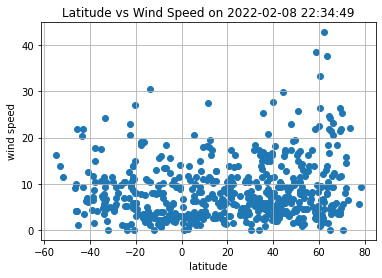

In [18]:
# lat vs temp basic plot
x_lat = city_df['lat']
y_windspeed = city_df['wind speed']
plt.scatter(x_lat, y_windspeed)

# titles, labels, and design elements
plt.title(f'Latitude vs Wind Speed on {run_date}')
plt.xlabel('latitude')
plt.ylabel('wind speed')
plt.grid()

# display plot
plt.show()

In [19]:
# export .png to file
plt.savefig("../output_data/LatVsWindSpeed.png")

<Figure size 432x288 with 0 Axes>

## Linear Regression

In [20]:
northern_df = city_df.loc[city_df['lat'] > 0]
southern_df = city_df.loc[city_df['lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between latitude and max temperature(F) in the Northern Hemisphere is -0.8415201866574561



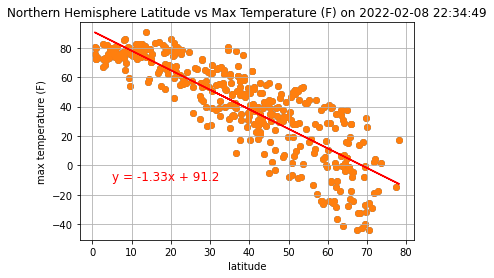

In [23]:
# lat vs temp basic plot
x_lat_north = northern_df['lat']
y_maxtemp_north = northern_df['max temp']
plt.scatter(x_lat_north, y_maxtemp_north)

# titles, labels, and design elements
plt.title(f'Northern Hemisphere Latitude vs Max Temperature (F) on {run_date}')
plt.xlabel('latitude')
plt.ylabel('max temperature (F)')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_maxtemp_north)
regress_values = x_lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_north, y_maxtemp_north)
plt.plot(x_lat_north,regress_values,"r-")

plt.annotate(line_eq,(5, -10),fontsize=12,color="red")

print(f"The correlation between latitude and max temperature(F) in the Northern Hemisphere is {rvalue}")
print("")

# display plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between latitude and max temperature(F) in the Southern Hemisphere is 0.5225198040023205



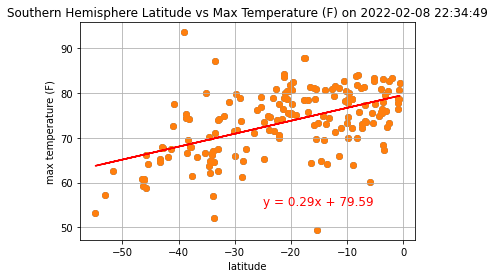

In [26]:
# lat vs temp basic plot
x_lat_south = southern_df['lat']
y_maxtemp_south = southern_df['max temp']
plt.scatter(x_lat_south, y_maxtemp_south)

# titles, labels, and design elements
plt.title(f'Southern Hemisphere Latitude vs Max Temperature (F) on {run_date}')
plt.xlabel('latitude')
plt.ylabel('max temperature (F)')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_maxtemp_south)
regress_values = x_lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_south, y_maxtemp_south)
plt.plot(x_lat_south,regress_values,"r-")

plt.annotate(line_eq,(-25, 55),fontsize=12,color="red")

print(f"The correlation between latitude and max temperature(F) in the Southern Hemisphere is {rvalue}")
print("")

# display plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between latitude and humidity in the Northern Hemisphere is 0.3362518808499224



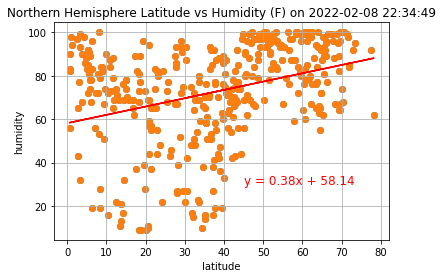

In [29]:
# lat vs temp basic plot
x_lat_north = northern_df['lat']
y_humidity_north = northern_df['humidity']
plt.scatter(x_lat_north, y_humidity_north)

# titles, labels, and design elements
plt.title(f'Northern Hemisphere Latitude vs Humidity (F) on {run_date}')
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_humidity_north)
regress_values = x_lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_north, y_humidity_north)
plt.plot(x_lat_north,regress_values,"r-")

plt.annotate(line_eq,(45, 30),fontsize=12,color="red")

print(f"The correlation between latitude and humidity in the Northern Hemisphere is {rvalue}")
print("")

# display plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between latitude and max temperature(F) in the Southern Hemisphere is 0.4324015438135524



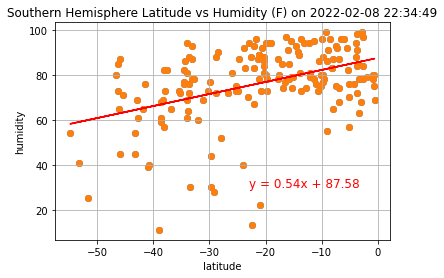

In [33]:
# lat vs temp basic plot
x_lat_south = southern_df['lat']
y_humidity_south = southern_df['humidity']
plt.scatter(x_lat_south, y_humidity_south)

# titles, labels, and design elements
plt.title(f'Southern Hemisphere Latitude vs Humidity (F) on {run_date}')
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_humidity_south)
regress_values = x_lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_south, y_humidity_south)
plt.plot(x_lat_south,regress_values,"r-")

plt.annotate(line_eq,(-23, 30),fontsize=12,color="red")

print(f"The correlation between latitude and max temperature(F) in the Southern Hemisphere is {rvalue}")
print("")

# display plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between latitude and cloudiness in the Northern Hemisphere is 0.2570688141389488



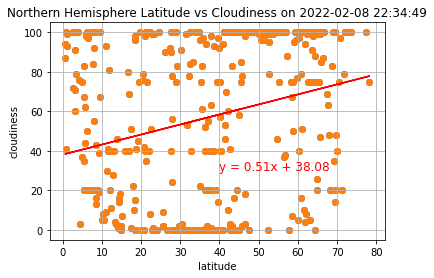

In [37]:
# lat vs temp basic plot
x_lat_north = northern_df['lat']
y_cloudiness_north = northern_df['cloudiness']
plt.scatter(x_lat_north, y_cloudiness_north)

# titles, labels, and design elements
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {run_date}')
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_cloudiness_north)
regress_values = x_lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_north, y_cloudiness_north)
plt.plot(x_lat_north,regress_values,"r-")

plt.annotate(line_eq,(40, 30),fontsize=12,color="red")

print(f"The correlation between latitude and cloudiness in the Northern Hemisphere is {rvalue}")
print("")

# display plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between latitude and cloudiness in the Southern Hemisphere is 0.2337439144832564



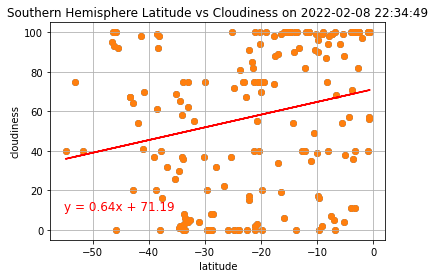

In [38]:
# lat vs temp basic plot
x_lat_south = southern_df['lat']
y_cloudiness_south = southern_df['cloudiness']
plt.scatter(x_lat_south, y_cloudiness_south)

# titles, labels, and design elements
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {run_date}')
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_cloudiness_south)
regress_values = x_lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_south, y_cloudiness_south)
plt.plot(x_lat_south,regress_values,"r-")

plt.annotate(line_eq,(-55, 10),fontsize=12,color="red")

print(f"The correlation between latitude and cloudiness in the Southern Hemisphere is {rvalue}")
print("")

# display plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between latitude and wind speed in the Northern Hemisphere is 0.22108505860778227



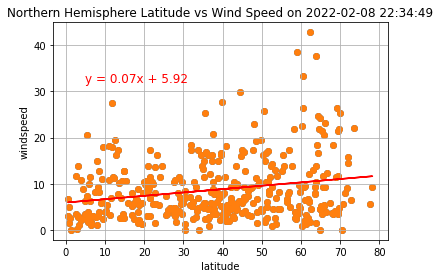

In [40]:
# lat vs temp basic plot
x_lat_north = northern_df['lat']
y_windspeed_north = northern_df['wind speed']
plt.scatter(x_lat_north, y_windspeed_north)

# titles, labels, and design elements
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {run_date}')
plt.xlabel('latitude')
plt.ylabel('windspeed')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_windspeed_north)
regress_values = x_lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_north, y_windspeed_north)
plt.plot(x_lat_north,regress_values,"r-")

plt.annotate(line_eq,(5, 32),fontsize=12,color="red")

print(f"The correlation between latitude and wind speed in the Northern Hemisphere is {rvalue}")
print("")

# display plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between latitude and wind speed in the Southrn Hemisphere is -0.18063859619714953



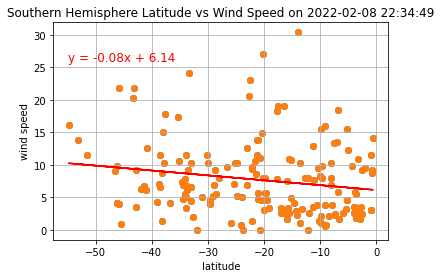

In [42]:
# lat vs temp basic plot
x_lat_south = southern_df['lat']
y_windspeed_south = southern_df['wind speed']
plt.scatter(x_lat_south, y_windspeed_south)

# titles, labels, and design elements
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {run_date}')
plt.xlabel('latitude')
plt.ylabel('wind speed')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_windspeed_south)
regress_values = x_lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_south, y_windspeed_south)
plt.plot(x_lat_south,regress_values,"r-")

plt.annotate(line_eq,(-55, 26),fontsize=12,color="red")

print(f"The correlation between latitude and wind speed in the Southrn Hemisphere is {rvalue}")
print("")

# display plot
plt.show()